In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from tensorflow.keras import Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
data = load_iris()

In [ ]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
labels = data["target_names"]

X_train, X_test, y_train, y_test = train_test_split(data["data"], data["target"], test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:5]

array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
       [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
       [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
       [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
       [ 1.63643991,  1.41631528,  1.30142668,  1.70589097]])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_onehot.shape, y_test_onehot.shape

((105, 4), (45, 4), (105,), (45,), (105, 3), (45, 3))

In [ ]:
batch_sizes = [2, 4]
rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

params = list(itertools.product(batch_sizes, rates, epochs))
params

[(2, 0.001, 1),
 (2, 0.001, 3),
 (2, 0.001, 5),
 (2, 1e-05, 1),
 (2, 1e-05, 3),
 (2, 1e-05, 5),
 (4, 0.001, 1),
 (4, 0.001, 3),
 (4, 0.001, 5),
 (4, 1e-05, 1),
 (4, 1e-05, 3),
 (4, 1e-05, 5)]

In [ ]:
models_arr = []

for para in params:
  print()
  print(para)
  print("-"*20)
  model = Sequential()
  model.add(Input((4,)))
  model.add(Dense(units=4, activation='relu'))
  model.add(Dense(units=16, activation='relu'))
  model.add(Dense(units=3, activation='softmax'))

  #model.load_weights("./model.h5")

  optimizer = Adam(learning_rate=para[1])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  t = model.fit(X_train,
            y_train_onehot,
            epochs=para[2],
            batch_size=para[0],
            validation_data=(X_test, y_test_onehot)
  )

  y_prediction = np.argmax(model.predict(X_test), axis = 1)

  d = {}
  d["model"] = model
  d["accuracy"] = accuracy_score(y_test, y_prediction)
  d["f1_score"] = f1_score(y_test, y_prediction, average="micro")
  d["confusion_matrix"] = confusion_matrix(y_prediction, y_test)

  models_arr.append(d)


(2, 0.001, 1)
--------------------
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3241 - loss: 1.1550 - val_accuracy: 0.4667 - val_loss: 1.0509
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

(2, 0.001, 3)
--------------------
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3179 - loss: 1.0778 - val_accuracy: 0.6667 - val_loss: 1.0746
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6705 - loss: 1.0372 - val_accuracy: 0.6889 - val_loss: 1.0358
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7441 - loss: 0.9913 - val_accuracy: 0.7111 - val_loss: 0.9876
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

(2, 0.001, 5)
--------------------
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1587 - loss: 1.1503 - val_accuracy: 0.6889 - val_loss: 1.0158
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 1.0028 - val_accuracy: 0.7111 - val_loss: 0.8418
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

(2, 1e-05, 1)
--------------------
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3389 - loss: 1.1409 - val_accuracy: 0.2222 - val_loss: 1.2550
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

(2, 1e-05, 3)
--------------------
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 1.4356 - val_accuracy: 0.0222 - val_loss: 1.5050
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1.3422 - val_accuracy: 0.0222 - val_loss: 1.5010
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.3628 - val_accuracy: 0.0222 - val_loss: 1.4967
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

(2, 1e-05, 5)
--------------------
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5239 - loss: 0.9837 - val_accuracy: 0.3778 - val_loss: 1.0165
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4517 - loss: 0.9895 - val_accuracy: 0.3778 - val_loss: 1.0155
Epoch 3/5
53/53 ━━━━━━━━━━

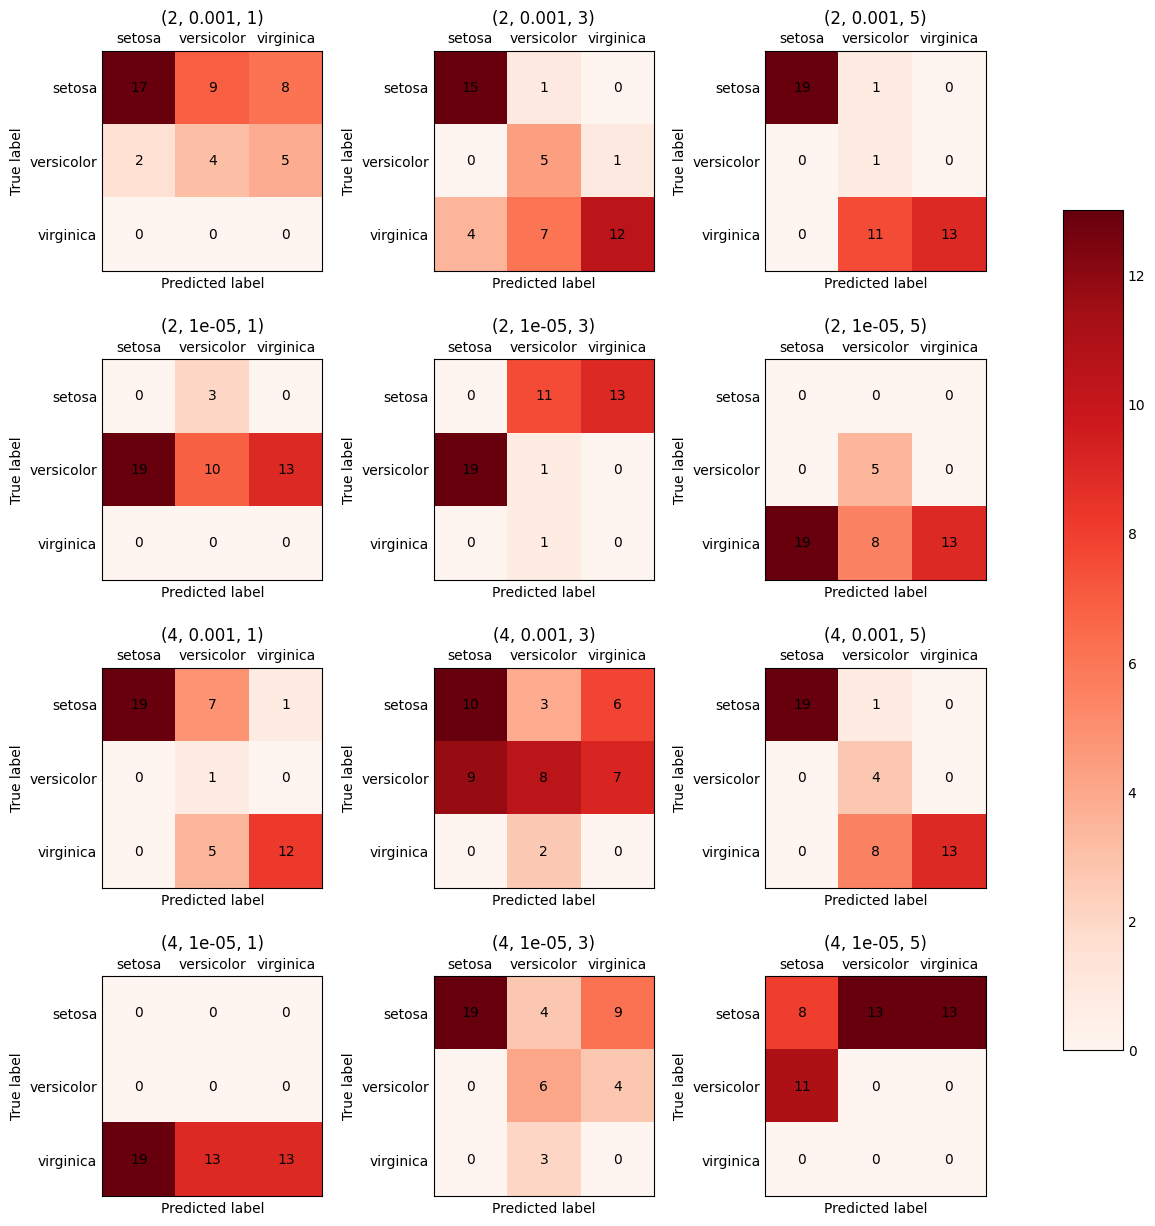

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('_mpl-gallery-nogrid')

fig, axs = plt.subplots(4,3, figsize = (12,12))
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

axs = axs.flatten()

for i,para in enumerate(params):
  axs[i].set_xticks([0,1,2], labels)
  axs[i].set_yticks([0,1,2], labels)

  axs[i].set_xlabel("Predicted label")
  axs[i].set_ylabel("True label")

  im = axs[i].imshow(models_arr[i]["confusion_matrix"], cmap="Reds", origin = "upper")

  axs[i].tick_params(top=True, bottom=False,
                  labeltop=True, labelbottom=False)

  for j in range(len(labels)):
    for k in range(len(labels)):
        text = axs[i].text(k, j, models_arr[i]["confusion_matrix"][j, k], ha="center", va="center", color="k")
  axs[i].set_title(para)

fig.colorbar(im, cax=cbar_ax)
plt.subplots_adjust(hspace=0.4, wspace = 0.3)
plt.show()

In [ ]:
random_samples = np.random.choice(X_test.shape[0],5)
random_samples

array([35,  2,  8, 20, 27])

In [ ]:
models_arr[0]["model"].predict(np.array([X_test[17]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.34747458, 0.35221997, 0.30030546]], dtype=float32)

In [ ]:
for para,model in zip(params,models_arr):
  model = model["model"]
  print("\n\nModel with (batch_size, learning_rate, epochs):",para)
  print("-"*80)
  print("Sno. | Sample \t\t\t\t\t\t| True Value \t| Predicted value")
  print("-"*80)
  for i,sample in enumerate(random_samples):
    print(f"{i}) | {X_test[sample]} \t| {y_test[sample]} \t\t|{np.argmax(model.predict(np.array([X_test[sample]]), verbose = 0), axis = 1).item()}")



Model with (batch_size, learning_rate, epochs): (2, 0.001, 1)
--------------------------------------------------------------------------------
Sno. | Sample 						| True Value 	| Predicted value
--------------------------------------------------------------------------------
0) | [ 0.55122187 -1.22214302  0.65933022  0.89417548] 	| 2 		|1
1) | [ 2.23933883 -0.98228318  1.76840592  1.43531914] 	| 2 		|0
2) | [ 0.43064208 -1.94172256  0.36746819  0.35303182] 	| 1 		|0
3) | [-1.37805466  0.4568759  -1.32533157 -1.40568508] 	| 0 		|1
4) | [1.15412078 0.4568759  1.18468187 1.43531914] 	| 2 		|0


Model with (batch_size, learning_rate, epochs): (2, 0.001, 3)
--------------------------------------------------------------------------------
Sno. | Sample 						| True Value 	| Predicted value
--------------------------------------------------------------------------------
0) | [ 0.55122187 -1.22214302  0.65933022  0.89417548] 	| 2 		|1
1) | [ 2.23933883 -0.98228318  1.76840592  1.43531914] 	| 

## Task 2: Automated Hyperparameter Search (20%)

In [ ]:
!pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
df_best = pd.DataFrame(columns=["Algorithm", "Configuration", "Accuracy", "F1 score"])

### Grid Search

In [ ]:
# Using previously trained models in models_arr
accuracy_arr = []
for model in models_arr:
  accuracy_arr.append(model["accuracy"])

best_grid_idx = np.argmax(accuracy_arr)

df_best.loc[len(df_best)] = ["Grid Search", params[best_grid_idx], models_arr[best_grid_idx]["accuracy"], models_arr[best_grid_idx]["f1_score"]]

### Random Search using Autogluon

In [ ]:
from ray import tune
from autogluon.multimodal import MultiModalPredictor

predictor_hpo_random = MultiModalPredictor(label="label")

hyperparameters = {
            "optimization.learning_rate": tune.choice([1e-3 , 1e-5]),
            "optimization.max_epochs": tune.choice([1, 3, 5]),
            "env.batch_size": tune.choice([2,4])
}

hyperparameter_tune_kwargs = {
    "searcher": "random",
    "scheduler": "FIFO",
    "num_trials": 10,
    "num_to_keep": 3,
}

start_time_hpo = datetime.now()
predictor_hpo_random.fit(
        train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train)], axis=1),
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

predictor_hpo_random.leaderboard()

OSError: /usr/local/lib/python3.11/dist-packages/torchaudio/lib/libtorchaudio.so: undefined symbol: _ZNK3c105Error4whatEv

### Bayesian Search using Autogluon

In [ ]:
predictor_hpo_bayes = MultiModalPredictor(label="label")

hyperparameters = {
            "optimization.learning_rate": tune.choice([1e-3 , 1e-5]),
            "optimization.max_epochs": tune.choice([1, 3, 5]),
            "env.batch_size": tune.choice([2,4])
}

hyperparameter_tune_kwargs = {
    "searcher": "bayes",
    "scheduler": "FIFO",
    "num_trials": 10,
    "num_to_keep": 3,
}

start_time_hpo = datetime.now()
predictor_hpo_bayes.fit(
        train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train)], axis=1),
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    )
end_time_hpo = datetime.now()
elapsed_seconds_hpo = (end_time_hpo - start_time_hpo).total_seconds()
elapsed_min_hpo = divmod(elapsed_seconds_hpo, 60)
print("Total fitting time: ", f"{int(elapsed_min_hpo[0])}m{int(elapsed_min_hpo[1])}s")

### Hyperland Search using Autogluon

In [ ]:
predictor_hpo_bayes = MultiModalPredictor(label="label")

hyperparameters = {
            "optimization.learning_rate": tune.choice([1e-3 , 1e-5]),
            "optimization.max_epochs": tune.choice([1, 3, 5]),
            "env.batch_size": tune.choice([2,4])
}

hyperparameter_tune_kwargs = {
    "searcher": "bayes",
    "scheduler": "ASHA"
    "num_trials": 10,
    "num_to_keep": 3,
}

start_time_hpo = datetime.now()
predictor_hpo_bayes.fit(
        train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train)], axis=1),
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    )
end_time_hpo = datetime.now()
elapsed_seconds_hpo = (end_time_hpo - start_time_hpo).total_seconds()
elapsed_min_hpo = divmod(elapsed_seconds_hpo, 60)
print("Total fitting time: ", f"{int(elapsed_min_hpo[0])}m{int(elapsed_min_hpo[1])}s")